In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('national_parks.csv')

In [3]:
data.shape

(57, 4)

In [4]:
data.columns

Index(['Year', 'Badlands', 'GrandCanyon', 'BryceCanyon'], dtype='object')

In [5]:
data.head()

,Year,Badlands,GrandCanyon,BryceCanyon
0,1961,833300,1253000,264800
1,1962,1044800,1447400,251000
2,1963,1074000,1539500,289500
3,1964,1079800,1576600,300300
4,1965,1091300,1689200,366800


In [6]:
data.isna().sum()

Year           0
Badlands       0
GrandCanyon    0
BryceCanyon    0
dtype: int64

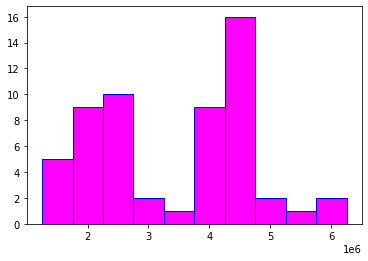

In [17]:
plt.hist(data['GrandCanyon'],facecolor = 'magenta', edgecolor = 'blue', bins = 10)
plt.show()

(array([ 5., 14., 24., 26., 27., 36., 52., 54., 55., 57.]),
 array([1253000. , 1753123.8, 2253247.6, 2753371.4, 3253495.2, 3753619. ,
        4253742.8, 4753866.6, 5253990.4, 5754114.2, 6254238. ]),
 <BarContainer object of 10 artists>)

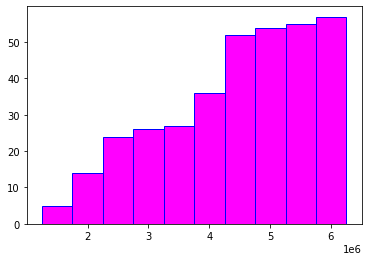

In [18]:
plt.hist(data['GrandCanyon'], edgecolor='blue', facecolor='magenta',bins=10, cumulative=True)

In [27]:
data2 = data.head(10)
data2

,Year,Badlands,GrandCanyon,BryceCanyon
0,1961,833300,1253000,264800
1,1962,1044800,1447400,251000
2,1963,1074000,1539500,289500
3,1964,1079800,1576600,300300
4,1965,1091300,1689200,366800
5,1966,1094800,1806000,396600
6,1967,1188700,1804900,295000
7,1968,1194600,1986300,320800
8,1969,1221300,2192600,366900
9,1970,1303100,2258200,345900


<AxesSubplot:title={'center':'Grouped bars of first 10 years'}, xlabel='Year'>

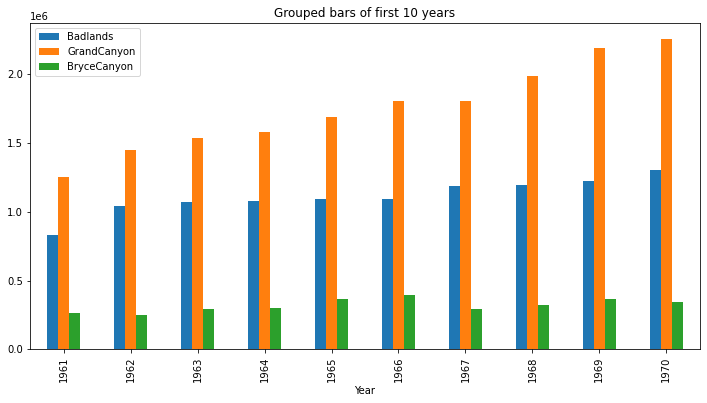

In [39]:
data2.plot(kind = 'bar', 
           x = 'Year', 
           stacked=False, title = 'Grouped bars of first 10 years', 
           figsize =(12,6),
           fontsize = 10
          )

<BarContainer object of 10 artists>

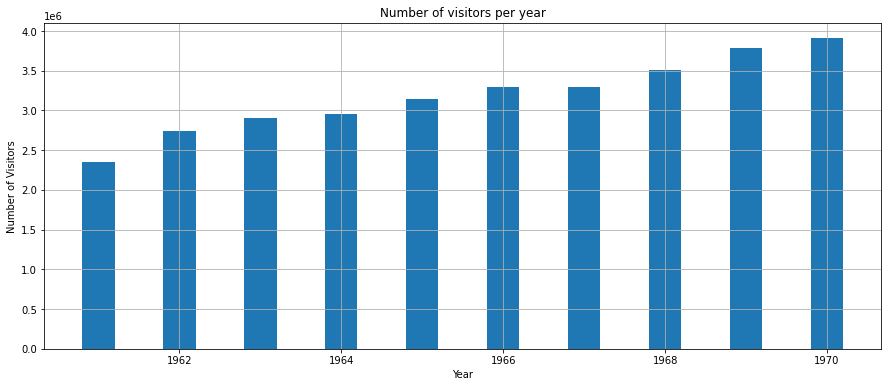

In [59]:
sums = data2.sum(axis =1)
years = data2['Year']
plt.figure(figsize =(15,6))
plt.xlabel('Year')
plt.ylabel('Number of Visitors')
plt.title('Number of visitors per year')
plt.grid()
plt.bar(years, sums, width= 0.4)

<BarContainer object of 10 artists>

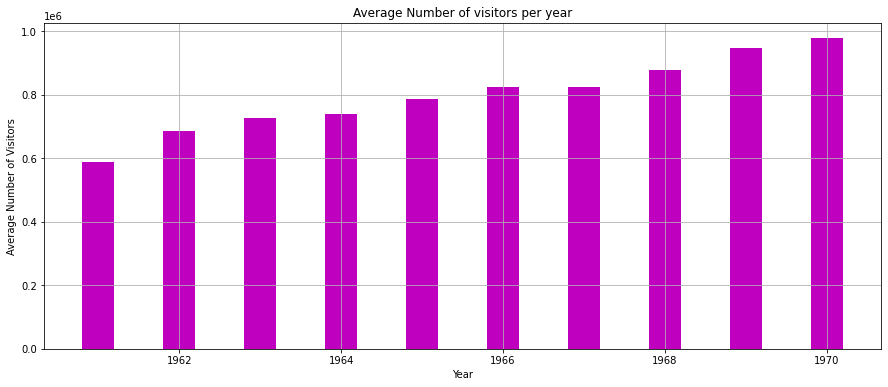

In [64]:
average = data2.mean(axis = 1)
plt.figure(figsize =(15,6))
plt.xlabel('Year')
plt.ylabel('Average Number of Visitors')
plt.title('Average Number of visitors per year')
plt.grid()
plt.bar(years, average, width= 0.4, color = 'm')

In [15]:
mostVisitors = data.sum(axis =1).max()
leastVisitors = data.sum(axis = 1).min()
print("Most number of viistor: {0}".format(mostVisitors))
print('Least number of visitor: {0}'.format(leastVisitors))

Most number of viistor: 9882264in the year:{0}
Least number of visitor: 2353061


### Stack plots
Stacks plots and gives overtime visualization

In [7]:
data.head()

,Year,Badlands,GrandCanyon,BryceCanyon
0,1961,833300,1253000,264800
1,1962,1044800,1447400,251000
2,1963,1074000,1539500,289500
3,1964,1079800,1576600,300300
4,1965,1091300,1689200,366800


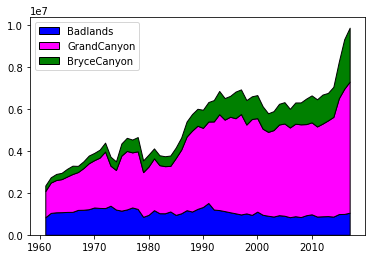

In [10]:
x = data['Year']
y = np.vstack([data['Badlands'],data['GrandCanyon'],data['BryceCanyon']])
labels = ['Badlands','GrandCanyon','BryceCanyon']

colors = ['blue','magenta','green']

plt.stackplot(x,y, labels=labels, colors=colors, edgecolor='black')
plt.legend(loc = 2)
plt.show()

### Stem plots

In [16]:
stem = data.copy()

In [17]:
stem[['Badlands','GrandCanyon','BryceCanyon']] = data[['Badlands','GrandCanyon','BryceCanyon']].diff()


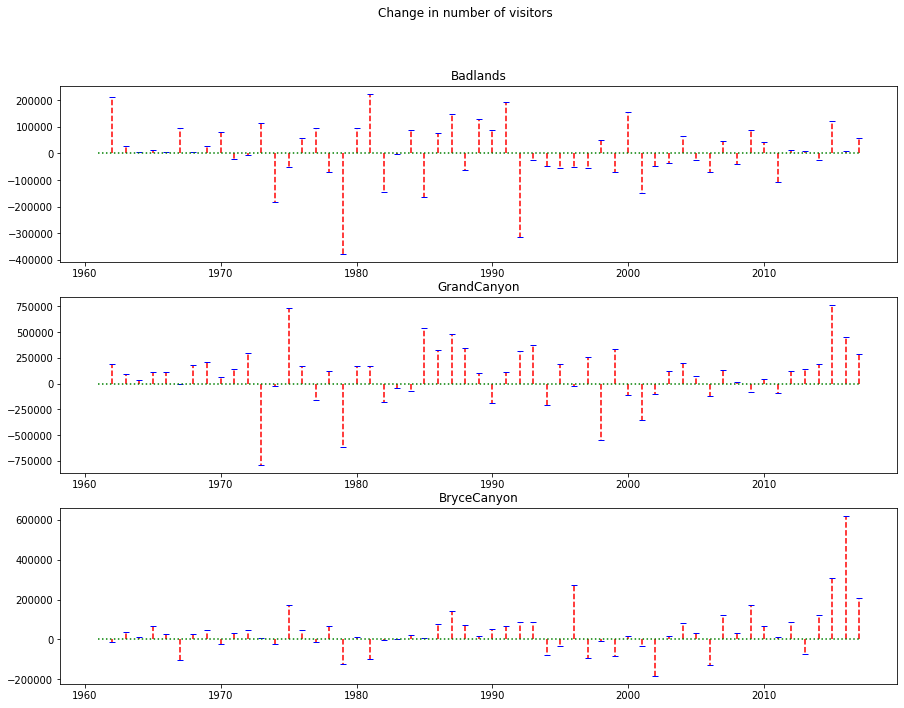

In [18]:
plt.figure(figsize=(15,11))
plt.suptitle('Change in number of visitors')

plt.subplot(311)
plt.stem(stem['Year'],stem['Badlands'], markerfmt='b_', linefmt='r--',basefmt='g:')
plt.title('Badlands')

plt.subplot(312)
plt.stem(stem['Year'],stem['GrandCanyon'], markerfmt='b_', linefmt='r--',basefmt='g:')
plt.title('GrandCanyon')

plt.subplot(313)
plt.stem(stem['Year'],stem['BryceCanyon'], markerfmt='b_', linefmt='r--',basefmt='g:')
plt.title('BryceCanyon')

plt.show()